In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv("../data/translated_go_emotion.csv", index_col=0)
df.head(2)

,text,text_pl,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,Ten mecz bolał.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,>Seksualność nie powinna być kategorią grupuj...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='text_pl'>

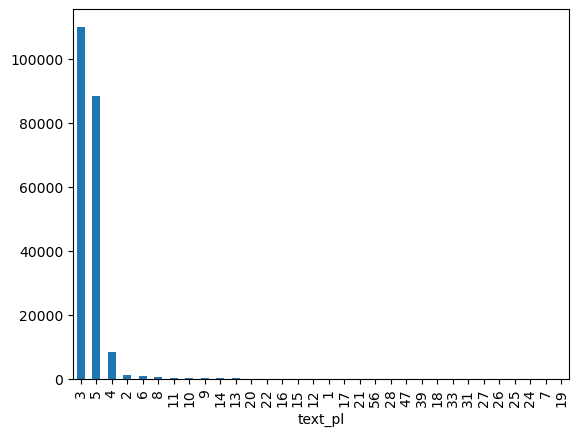

In [104]:
df.groupby('text_pl')["text_pl"].transform('count').value_counts().plot.bar()

In [105]:
df_marked_by_three_adnotators = df[df.groupby('text_pl')["text_pl"].transform('count') == 3]

<Axes: xlabel='text_pl'>

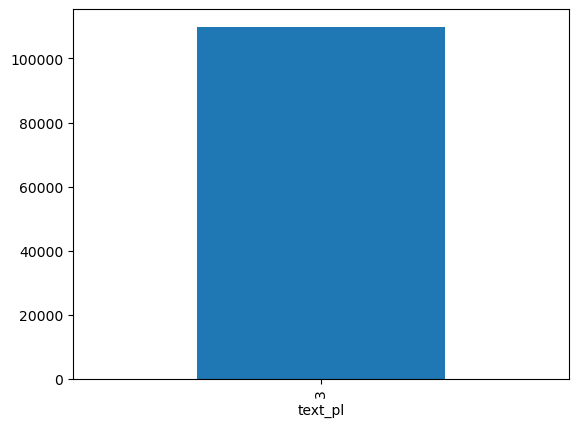

In [106]:
df_marked_by_three_adnotators.groupby('text_pl')["text_pl"].transform('count').value_counts().plot.bar()

In [107]:
EMOTION_NAME = "admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral".split(",")

In [108]:
len(EMOTION_NAME)

28

In [109]:
df_marked_by_three_adnotators.groupby('text_pl').sum(EMOTION_NAME).head(3)

,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
text_pl,,,,,,,,,,,,,,,,,,,,,
"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym tam być, aby wziąć zamach na tę softball.",4.642973e+09,102,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
"### Z pewnością niespodzianka, ale mile widziana",4.640566e+09,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
"'*Pray*, v. Prosić o unieważnienie praw wszechświata w imieniu pojedynczego petenta, rzekomo niegodnego' - [NAME].",4.640221e+09,96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [110]:
grouped = df_marked_by_three_adnotators.groupby('text_pl')[EMOTION_NAME].sum()

golden_label = grouped.applymap(lambda x: 1 if x >= 2 else 0)
golden_label.head(3)

/tmp/ipykernel_42345/3756722778.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  golden_label = grouped.applymap(lambda x: 1 if x >= 2 else 0)


,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
text_pl,,,,,,,,,,,,,,,,,,,,,
"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym tam być, aby wziąć zamach na tę softball.",0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
"### Z pewnością niespodzianka, ale mile widziana",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"'*Pray*, v. Prosić o unieważnienie praw wszechświata w imieniu pojedynczego petenta, rzekomo niegodnego' - [NAME].",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
golden_label_reset_index = golden_label.reset_index()
duplicates = golden_label_reset_index[golden_label_reset_index['text_pl'].duplicated(keep=False)]

# Check if there are any duplicates
if not duplicates.empty:
    print(f"Found {duplicates.shape[0]} duplicate rows:")
    print(duplicates)
else:
    print("No duplicates found in 'text_pl'.")


No duplicates found in 'text_pl'.


<Axes: >

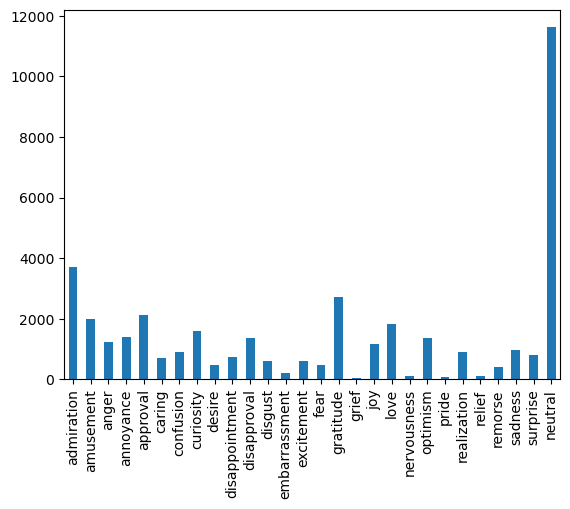

In [87]:
golden_label.sum().plot.bar()

In [88]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Example one-hot encoded DataFrame
# df = pd.DataFrame({'cat_A': [1, 0, 0], 'cat_B': [0, 1, 0], 'cat_C': [0, 0, 1]})

# Step 1: Convert one-hot encoding to a single category column
# df['category'] = df[['cat_A', 'cat_B', 'cat_C']].idxmax(axis=1)

# Step 2: Stratified split
# train, temp = train_test_split(df, test_size=0.3, stratify=df['category'], random_state=42)
# val, test = train_test_split(temp, test_size=0.5, stratify=temp['category'], random_state=42)

# # Step 3: Drop the temporary 'category' column
# train = train.drop('category', axis=1)
# val = val.drop('category', axis=1)
# test = test.drop('category', axis=1)

# # Check sizes and proportions if needed
# print(f"Train size: {len(train)}, Validation size: {len(val)}, Test size: {len(test)}")


0    cat_A
1    cat_B
2    cat_C
dtype: object

In [ ]:
golden_label = golden_label.reset_index()

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym...",0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,"### Z pewnością niespodzianka, ale mile widziana",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"'*Pray*, v. Prosić o unieważnienie praw wszec...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,">Niestety, zostanie zaatakowany przez tankie....",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"Boję się nawet zapytać mamę, mogę zostać skrz...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36638,🤷🏻‍♀️ Jak powiedział kiedyś pewien mądry człow...,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36639,🤷🏼‍♀️ Zastanawiałem się nad tym samym. Wygląda...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36640,🦀 MOJE DZIECI NIE ŻYJĄ🦀,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36641,🦀🦀🦀🦀🦀🦀🦀🦀🦀 Jestem kiepski w tej grze🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
golden_label[EMOTION_NAME].columns

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [97]:
golden_label[EMOTION_NAME].columns.get_indexer(golden_label[EMOTION_NAME].idxmax(1))+1

array([ 8, 27, 28, ..., 28, 10,  1])

In [ ]:
from sklearn.model_selection import train_test_split

train, temp = train_test_split(golden_label, test_size=0.2, stratify=df['category_column'], random_state=42)

# Step 2: Split temp into validation and test
val, test = train_test_split(temp, test_size=0.5, stratify=temp['category_column'], random_state=42)

# Check the sizes
print(f"Train size: {len(train)}, Validation size: {len(val)}, Test size: {len(test)}")


In [116]:
golden_label = golden_label.drop(columns=["neutral"])

In [117]:
mean = golden_label.sum().mean()
std_dev = golden_label.sum().std()

print("Average (Mean):", mean)
print("Standard Deviation:", std_dev)


Average (Mean): 1063.4814814814815
Standard Deviation: 861.7973334111936


In [118]:
golden_label.head(3)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
text_pl,,,,,,,,,,,,,,,,,,,,,
"""Jak wyglądają Szkoci?"". Jak bardzo chciałbym tam być, aby wziąć zamach na tę softball.",0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
"### Z pewnością niespodzianka, ale mile widziana",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"'*Pray*, v. Prosić o unieważnienie praw wszechświata w imieniu pojedynczego petenta, rzekomo niegodnego' - [NAME].",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
int(mean+std_dev)

1925

In [122]:
EMOTION_NAME = [e for e in EMOTION_NAME if e != "neutral"]

In [123]:
for emotion in EMOTION_NAME:
    emotion_rows = golden_label[golden_label[emotion] == 1]
    if emotion_rows.shape[0] > int(mean+std_dev):
        print(emotion)


admiration
amusement
approval
gratitude


In [124]:
filtered_golden_label = pd.DataFrame()

for emotion in EMOTION_NAME:
    emotion_rows = golden_label[golden_label[emotion] == 1]
    
    if emotion_rows.shape[0] > int(mean+std_dev):
        emotion_rows = emotion_rows.iloc[:int(mean+std_dev), :]
    
    filtered_golden_label = pd.concat([filtered_golden_label, emotion_rows])

filtered_golden_label = filtered_golden_label.reset_index() # drop=True

filtered_golden_label = filtered_golden_label.drop_duplicates(keep='first').reset_index(drop=True)

filtered_golden_label.head(3)


,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,Mój młodszy brat miał taką zabawkę! Super.,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Najlepszy numer! [NAZWA], [NAZWA], [NAZWA]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"yay!!! Gratulacje! Jesteś taka ładna, makijaż...",1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
golden_label_reset_index = filtered_golden_label.reset_index()
duplicates = golden_label_reset_index[golden_label_reset_index['text_pl'].duplicated(keep=False)]

# Check if there are any duplicates
if not duplicates.empty:
    print(f"Found {duplicates.shape[0]} duplicate rows:")
    print(duplicates)
else:
    print("No duplicates found in 'text_pl'.")


No duplicates found in 'text_pl'.


<Axes: >

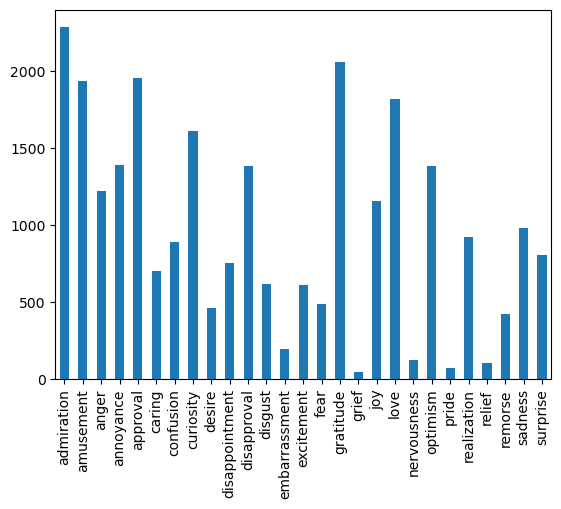

In [126]:
filtered_golden_label[EMOTION_NAME].sum().plot.bar()

In [130]:
mean = golden_label[EMOTION_NAME].sum().mean()
std_dev = golden_label[EMOTION_NAME].sum().std()

print("Average (Mean):", mean)
print("Standard Deviation:", std_dev)


Average (Mean): 1063.4814814814815
Standard Deviation: 861.7973334111936


In [131]:
int(mean-std_dev)

201

In [139]:
for emotion in EMOTION_NAME:
    # emotion_rows = golden_label[golden_label[emotion] == 1]
    
    if filtered_golden_label[filtered_golden_label[emotion] == 1].shape[0] < int(mean-std_dev):
        print(emotion)

embarrassment
grief
nervousness
pride
relief


In [138]:
emotion

'surprise'

In [141]:
golden_label_copy = pd.DataFrame(filtered_golden_label)
golden_label_copy = golden_label_copy.reset_index()


for emotion in EMOTION_NAME:
    # emotion_rows = golden_label[golden_label[emotion] == 1]
    
    if golden_label_copy[golden_label_copy[emotion] == 1].shape[0] < int(mean-std_dev):
        emotion_rows = df[df[emotion] == 1]
        emotion_rows = emotion_rows.drop_duplicates(subset='text_pl')
        emotion_rows = emotion_rows[['text_pl'] + EMOTION_NAME]

        # Filter rows from emotion_rows where 'text_pl' is not already in golden_label_copy
        new_rows = emotion_rows[~emotion_rows['text_pl'].isin(golden_label_copy['text_pl'])]

        existing_rows_bool = emotion_rows['text_pl'].isin(golden_label_copy['text_pl'])
        emotion_rows.loc[existing_rows_bool, emotion] = 1

        # emotion_without = [e for e in EMOTION_NAME if e != emotion]
        # new_rows.loc[: , emotion_without] = 0

        # Append the new rows to golden_label_copy
        golden_label_copy = pd.concat([golden_label_copy, new_rows], ignore_index=True)


In [142]:
golden_label_copy.head(3)

,index,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,0.0,Mój młodszy brat miał taką zabawkę! Super.,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,"Najlepszy numer! [NAZWA], [NAZWA], [NAZWA]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,"yay!!! Gratulacje! Jesteś taka ładna, makijaż...",1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<Axes: >

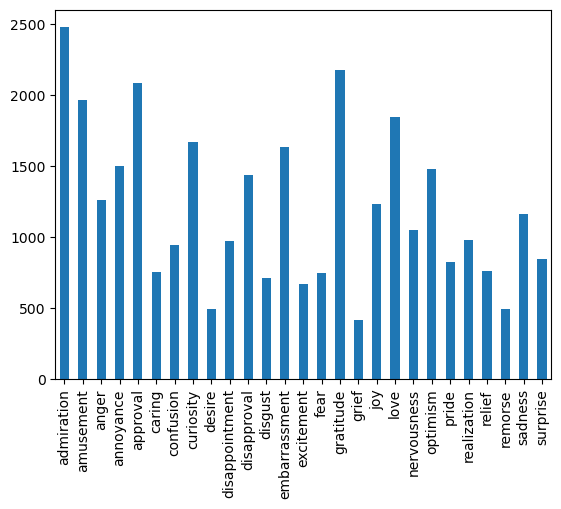

In [143]:
golden_label_copy[EMOTION_NAME].sum().plot.bar()

<Axes: >

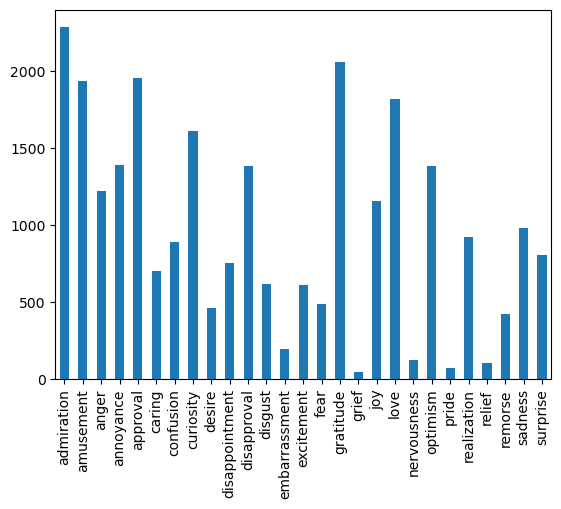

In [144]:
filtered_golden_label[EMOTION_NAME].sum().plot.bar()

In [37]:
golden_label_copy.shape


(30857, 30)

In [38]:
df.shape

(211225, 38)

In [39]:
duplicates = golden_label_copy[golden_label_copy['text_pl'].duplicated(keep=False)]

# Check if there are any duplicates
if not duplicates.empty:
    print(f"Found {duplicates.shape[0]} duplicate rows:")
    print(duplicates)
else:
    print("No duplicates found in 'text_pl'.")


No duplicates found in 'text_pl'.


In [72]:
golden_label_copy[['text_pl'] + EMOTION_NAME]

,text_pl,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Mój młodszy brat miał taką zabawkę! Super.,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Najlepszy numer! [NAZWA], [NAZWA], [NAZWA]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"yay!!! Gratulacje! Jesteś taka ładna, makijaż...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,!!!!! Najlepsza dziewczyna,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""...ostatni raz na dobre""",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30852,"Niech ktoś powie [NAME], żeby informował o tyc...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30853,Przynajmniej będę miał normalną długość życia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30854,"Oh, my [NAME]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30855,"W końcu otrzymuje pomoc, której potrzebuje",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
golden_label_copy[['text_pl'] + EMOTION_NAME].to_csv("balanced_data_set.csv", index=False)

In [74]:
golden_label_copy.dtypes

index             float64
text_pl            object
admiration          int64
amusement           int64
anger               int64
annoyance           int64
approval            int64
caring              int64
confusion           int64
curiosity           int64
desire              int64
disappointment      int64
disapproval         int64
disgust             int64
embarrassment       int64
excitement          int64
fear                int64
gratitude           int64
grief               int64
joy                 int64
love                int64
nervousness         int64
optimism            int64
pride               int64
realization         int64
relief              int64
remorse             int64
sadness             int64
surprise            int64
neutral             int64
dtype: object

In [75]:
golden_label_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30857 entries, 0 to 30856
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           28157 non-null  float64
 1   text_pl         30857 non-null  object 
 2   admiration      30857 non-null  int64  
 3   amusement       30857 non-null  int64  
 4   anger           30857 non-null  int64  
 5   annoyance       30857 non-null  int64  
 6   approval        30857 non-null  int64  
 7   caring          30857 non-null  int64  
 8   confusion       30857 non-null  int64  
 9   curiosity       30857 non-null  int64  
 10  desire          30857 non-null  int64  
 11  disappointment  30857 non-null  int64  
 12  disapproval     30857 non-null  int64  
 13  disgust         30857 non-null  int64  
 14  embarrassment   30857 non-null  int64  
 15  excitement      30857 non-null  int64  
 16  fear            30857 non-null  int64  
 17  gratitude       30857 non-null 